# Ismail Olumegbon

# Homework \#7 Basic Data Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ls drive/Shareddrives

ZZhang_Teaching/


In [58]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import datetime

class CERES_data(object):
    def __init__(self,fn):
        import netCDF4 as nc
        nc_fid = nc.Dataset(fn,'r')
        nc_fid.set_auto_mask(False)
        self.t0   = datetime.datetime(2000,3,1)
        self.time = nc_fid.variables['time'][:] 
        days = []
        for t in self.time:
            days.append(self.t0 +  datetime.timedelta(float(t)))
        self.days = days
        self.lon  = nc_fid.variables['lon'][:] #* units('degree_E')
        self.lat  = nc_fid.variables['lat'][:] #* units('degree_N')
        self.toa_sw_all_mon = nc_fid.variables['toa_sw_all_mon'][:] 
        self.toa_lw_all_mon = nc_fid.variables['toa_lw_all_mon'][:] 
        self.toa_net_all_mon = nc_fid.variables['toa_net_all_mon'][:] 
        self.toa_lw_all_mon = nc_fid.variables['toa_lw_all_mon'][:] 
        self.toa_sw_clr_t_mon = nc_fid.variables['toa_sw_clr_t_mon'][:] 
        self.toa_lw_clr_t_mon = nc_fid.variables['toa_lw_clr_t_mon'][:] 
        self.toa_net_clr_t_mon = nc_fid.variables['toa_net_clr_t_mon'][:] 

        self.toa_cre_sw_mon = nc_fid.variables['toa_cre_sw_mon'][:] 
        self.toa_cre_lw_mon = nc_fid.variables['toa_cre_lw_mon'][:] 
        self.toa_cre_net_mon = nc_fid.variables['toa_cre_net_mon'][:] 

        self.solar_mon= nc_fid.variables['solar_mon'][:]
        self.cldarea_total_daynight_mon = nc_fid.variables['cldarea_total_daynight_mon'][:] 

        nc_fid.close()

In [4]:
CERES = CERES_data('drive/Shareddrives/ZZhang_Teaching/Data/CERES_EBAF_Edition4.1_200003-202011.nc')

In [5]:
print('number of months:', len(CERES.days))
print('number of latitude points:', len(CERES.lat))
print('number of longitude points:', len(CERES.lon))
print('dimensions of the data self.solar_mon',CERES.solar_mon.shape)
print('dimensions of cldarea_total_daynight_mon',CERES.cldarea_total_daynight_mon.shape)

number of months: 249
number of latitude points: 180
number of longitude points: 360
dimensions of the data self.solar_mon (249, 180, 360)
dimensions of cldarea_total_daynight_mon (249, 180, 360)


## Problem \#1 Analysis of Temporal Variations 

**Do not forget to use cos(latitude) weigthing for the averaging over latitude**


*   Derive the time series of **montly-mean**(i.e., 249 months) of global-averaged 1) solar constant (solar_mon), 2) reflected SW (toa_sw_all_mon), 3) outgoing lw (toa_sw_all_mon) 4) net (SW+LW solar-reflected sw - outgoing lw) radiation at TOA.

*   Derive the time series of **annual-mean** (i.e., ~20 years) of global-averaged 1) solar constant (solar_mon), 2) reflected SW (toa_sw_all_mon), 3) outgoing lw (toa_sw_all_mon), 4) net (SW+LW solar-reflected sw - outgoing lw) radiation at TOA.

*   Derive the **20-year-averaged** annual cycle (i.e., 20 year average of Jan. Feb, March....) of 1) solar constant (solar_mon), 2) reflected SW (toa_sw_all_mon), 3) outgoing lw (toa_sw_all_mon) 4) net (SW+LW solar-reflected sw - outgoing lw) radiation at TOA.

*   Use the annual cycle to derive the de-seasonalized time series of **monthly-anormaly** (e.g., 2005 May minus 20-year averaged May) of  1) solar constant (solar_mon), 2) reflected SW (toa_sw_all_mon), 3) outgoing lw (toa_sw_all_mon) 4) net (SW+LW solar-reflected sw - outgoing lw) radiation at TOA.

**Plot the above results with propoer labels and legends**

In [6]:
cos_weight = np.cos(np.deg2rad(CERES.lat))
solar_constant_time_series_monthly = np.array([np.sum(CERES.solar_mon[i].mean(axis=(1))*cos_weight) for i in range(len(CERES.days))])
sw_reflected_time_series_monthly = np.array([np.sum(CERES.toa_sw_all_mon[i].mean(axis=(1))*cos_weight) for i in range(len(CERES.days))])
lw_outgoing_time_series_monthly = np.array([np.sum(CERES.toa_lw_all_mon[i].mean(axis=(1))*cos_weight) for i in range(len(CERES.days))])
net_monthly = sw_reflected_time_series_monthly - lw_outgoing_time_series_monthly

In [7]:
solar_constant_time_series_monthly.size, sw_reflected_time_series_monthly.size, lw_outgoing_time_series_monthly.size, net_monthly.size

(249, 249, 249, 249)

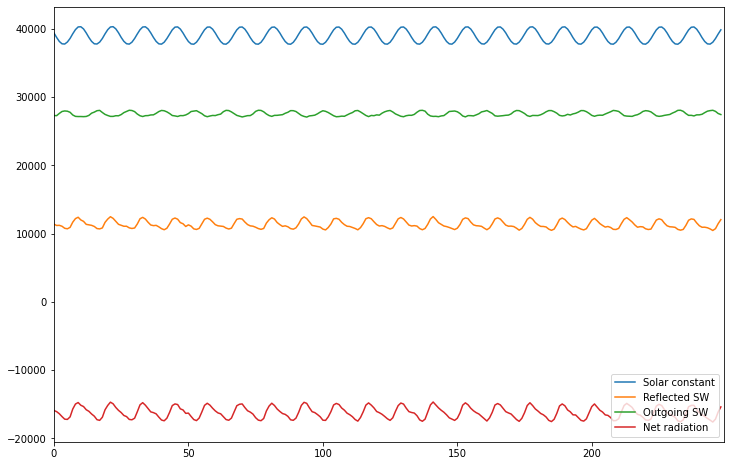

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(solar_constant_time_series_monthly, label="Solar constant")
ax.plot(sw_reflected_time_series_monthly, label="Reflected SW")
ax.plot(lw_outgoing_time_series_monthly, label="Outgoing SW")
ax.plot(net_monthly, label="Net radiation")
ax.set_xlim(0,249)
ax.legend(loc='lower right')
plt.show()

In [9]:
weight = np.cos(np.outer(CERES.lat, np.ones(360)))/ np.mean(np.cos(np.outer(CERES.lat, np.ones(360))))
solar_constant_time_series_annual = np.array([np.mean(CERES.solar_mon[12*i:12*(i+1)]*weight) for i in range(len(CERES.days))])
sw_reflected_time_series_annual = np.array([np.mean(CERES.toa_cre_sw_mon[12*i:12*(i+1)]*weight) for i in range(len(CERES.days))])
lw_outgoing_time_series_annual = np.array([np.mean(CERES.toa_cre_lw_mon[12*i:12*(i+1)]*weight) for i in range(len(CERES.days))])
net_annual = sw_reflected_time_series_annual - lw_outgoing_time_series_annual

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


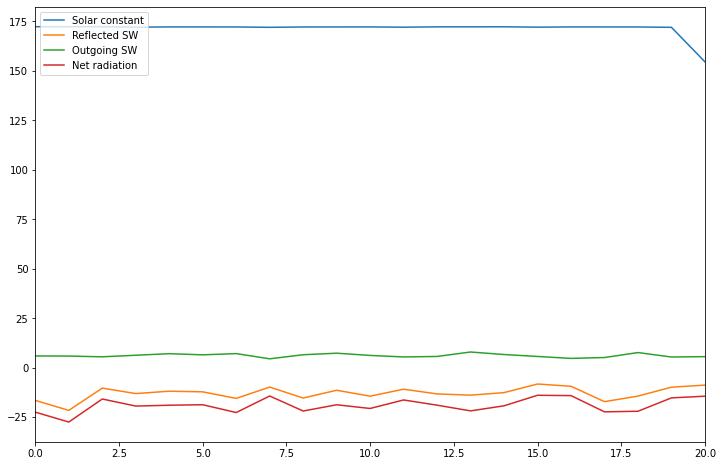

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(solar_constant_time_series_annual, label="Solar constant")
ax.plot(sw_reflected_time_series_annual, label="Reflected SW")
ax.plot(lw_outgoing_time_series_annual, label="Outgoing SW")
ax.plot(net_annual, label="Net radiation")
ax.set_xlim(0,20)
ax.legend(loc='upper left')
plt.show()

In [11]:
solar_constant_twenty_yr_avg = np.array([np.mean(CERES.solar_mon[i::12]*weight) for i in range(len(CERES.days))])
sw_reflected_twenty_yr_avg = np.array([np.mean(CERES.toa_sw_all_mon[i::12]*weight) for i in range(len(CERES.days))])
lw_outgoing_twenty_yr_avg = np.array([np.mean(CERES.toa_lw_all_mon[i::12]*weight) for i in range(len(CERES.days))])
net_20year = sw_reflected_twenty_yr_avg - lw_outgoing_twenty_yr_avg

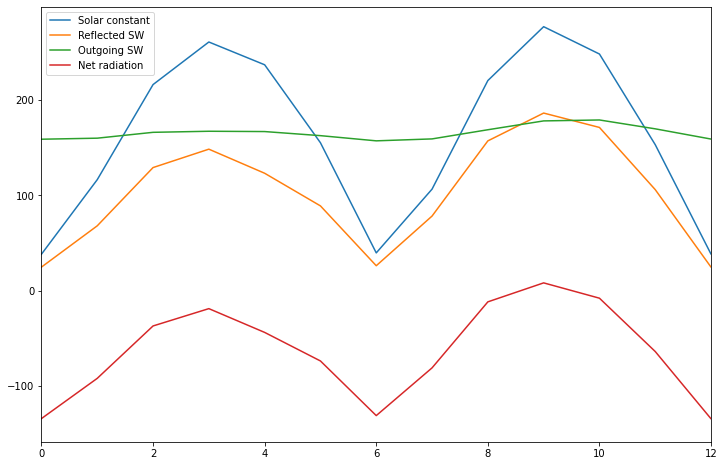

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(solar_constant_twenty_yr_avg, label="Solar constant")
ax.plot(sw_reflected_twenty_yr_avg, label="Reflected SW")
ax.plot(lw_outgoing_twenty_yr_avg, label="Outgoing SW")
ax.plot(net_20year, label="Net radiation")
ax.set_xlim(0,12)
ax.legend(loc='upper left')
plt.show()



---



---



## Problem \#2 Analysis of Spatial Variation
Again analyze the following variables: 1) solar constant (solar_mon), 2) reflected SW (toa_sw_all_mon), 3) outgoing lw (toa_sw_all_mon) 4) net (SW+LW solar-reflected sw - outgoing lw) radiation at TOA.

* Derive their **meridional-mean** (i.e., average over all the longitude) and time-averaged (i.e., average over all the months) and plot the results as a function of latitude. 

* Derive their **meridional-mean** (i.e., average over all the longitude) of **summer months** (averaged over June-July-Aug) and **winter months** (averaged over Dec.-Jan.-Feb).  


* Use pcolormesh to plot a color contour of time-averaged variables as a function of longitude (x-axis) and Latitude (y-axis). **Comments on the interesting features you noted in the figure**. 


In [23]:
summer = np.array(np.tile([0,0,0,1,1,1,0,0,0,0,0,0], 20)[:249],dtype=int)
winter = np.array(np.tile([0,0,0,0,0,0,0,0,0,1,1,1], 20)[:249],dtype=int)
meridional_mean_solar = np.mean(CERES.solar_mon,axis=(0,2))
summer_meridional_mean_solar = np.mean(CERES.solar_mon[summer], axis=(0,2))
winter_meridional_mean_solar = np.mean(CERES.solar_mon[winter], axis=(0,2))

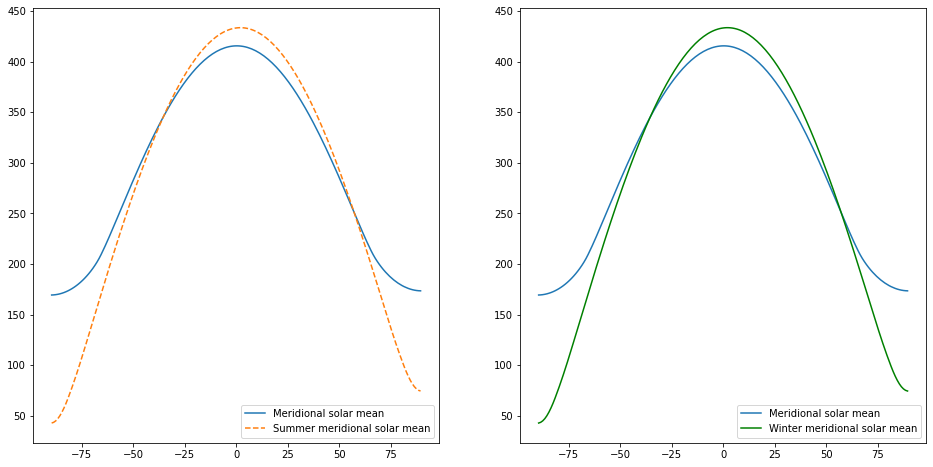

In [47]:
#fig, ax = plt.subplots(figsize=(12,8))
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.plot(CERES.lat, meridional_mean_solar, label="Meridional solar mean")
ax2.plot(CERES.lat, meridional_mean_solar, label="Meridional solar mean")
ax1.plot(CERES.lat, summer_meridional_mean_solar,'--', label="Summer meridional solar mean")
ax2.plot(CERES.lat, winter_meridional_mean_solar,c='g', label="Winter meridional solar mean")
ax1.legend(loc='best')
ax2.legend(loc='best')
plt.show()

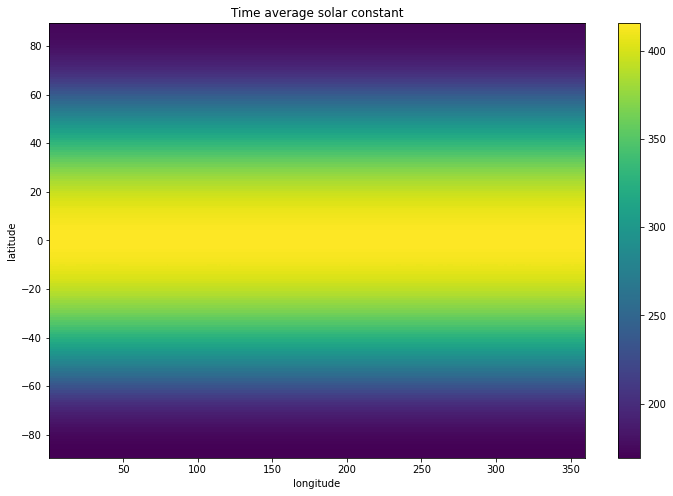

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
time_avg_solar = np.mean(CERES.solar_mon, axis=0)
c=ax.pcolormesh(CERES.lon, CERES.lat, time_avg_solar)
fig.colorbar(c,ax=ax)
ax.set_title('Time average solar constant')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.show()

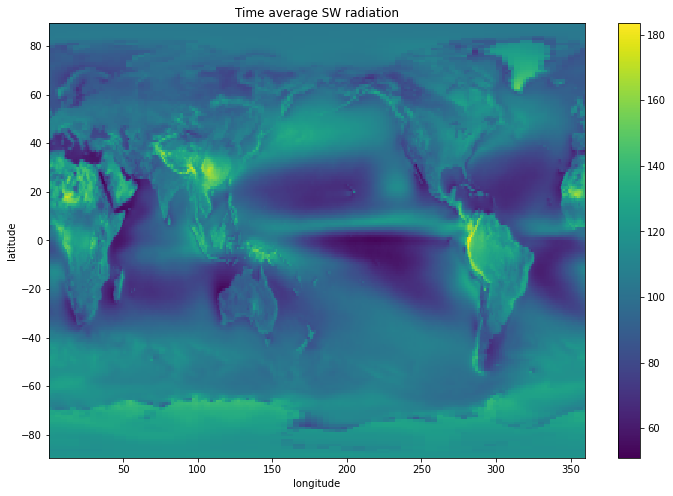

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
time_avg_sw = np.mean(CERES.toa_sw_all_mon, axis=0)
c=ax.pcolormesh(CERES.lon, CERES.lat, time_avg_sw)
fig.colorbar(c,ax=ax)
ax.set_title('Time average SW radiation')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.show()

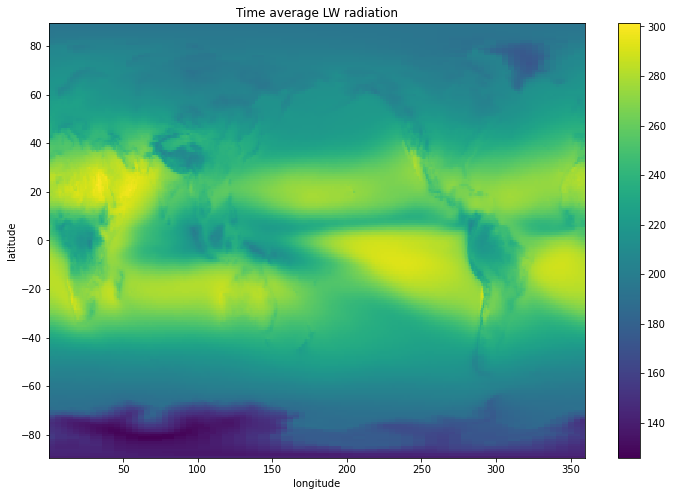

In [52]:
fig, ax = plt.subplots(figsize=(12,8))
time_avg_lw = np.mean(CERES.toa_lw_all_mon, axis=0)
c=ax.pcolormesh(CERES.lon, CERES.lat, time_avg_lw)
fig.colorbar(c,ax=ax)
ax.set_title('Time average LW radiation')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.show()

## Problem \#3 Analysis the OLR anomalies in the Tropical Pacific region 


An El Niño event refers to the warm and negative phase of the El Niño–Southern Oscillation and is the warming of the ocean surface or above-average sea surface temperatures in the central and eastern tropical Pacific Ocean. This warming causes a shift in the atmospheric circulation with rainfall becoming reduced over Indonesia, India and Australia, while rainfall and tropical cyclone formation increases over the tropical Pacific Ocean. The low-level surface trade winds, which normally blow from east to west along the equator, either weaken or start blowing from the other direction.

[Change of SST during El Niño event](https://en.wikipedia.org/wiki/El_Ni%C3%B1o#/media/File:Sstaanim.gif)


Outgoing Longwave Radiation (OLR) data at the top of the atmosphere is a good index of El Niño event. Negative (Positive) OLR are indicative of enhanced (suppressed) convection and hence more (less) cloud coverage typical of El Niño (La Niña) episodes. More (Less) convective activity in the central and eastern equatorial Pacific implies higher (lower), colder (warmer) cloud tops, which emit much less (more) infrared radiation into space.



*   Derive the time series of the LW outgoing radiation in the Centeral Tropical Pacific region (5S \<Latitude\<5N and 160E \<Latitude\<160W)) 
*   Plot the de-seasonalized time series of the OLR in this region and check periods with the positive and negative OLR anomalies and see if they are corresponding to the major El Niño (La Niña) episodes.



In [54]:
#latitude and longitude region of the Central tropical Pacific region
TPR_lat = (CERES.lat>-5.0) & (CERES.lat<5.0)
TPR_lon = (CERES.lon>160.0) & (CERES.lon<200.0)


In [55]:
TPR_lw = np.mean(CERES.toa_lw_all_mon[:,TPR_lat, :][:,:,TPR_lon],axis=(1,2))
twenty_yr_avg_TPR_lw = np.array([np.mean(TPR_lw[i::12]) for i in range(12)])
monthly_anomaly_TPR_lw = TPR_lw - np.tile(net_20year, 21)[:249]

In [56]:
CERES.t0

datetime.datetime(2000, 3, 1, 0, 0)

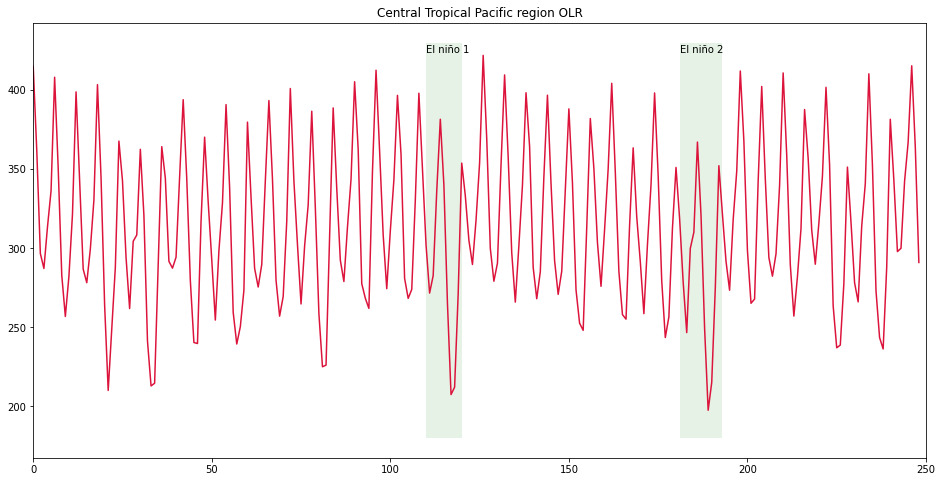

In [69]:
figure, ax = plt.subplots(figsize = (16,8))
ax.plot(monthly_anomaly_TPR_lw, c='crimson')
ax.text(110,423.5, "El niño 1")
ax.text(181,423.5, "El niño 2")
ax.set_title("Central Tropical Pacific region OLR",fontsize='large')
rect1=mpatches.Rectangle((110,180),10,250,alpha=0.1,facecolor="green")
rect2=mpatches.Rectangle((181,180),12,250,alpha=0.1,facecolor="green")
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.set_xlim(0,250)
plt.show()